In [3]:
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml('mnist_784', version=1)

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [6]:
x,y = mnist["data"], mnist["target"]

In [7]:
mnist["data"].shape

(70000, 784)

In [8]:
mnist.target_names

['class']

In [9]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [10]:
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [13]:
y.shape

(70000,)

In [14]:
import matplotlib as mpl
from matplotlib import pyplot as plt

In [15]:
some_digit = x[0] 
some_digit_image = some_digit.reshape(28,28) ## Reshape it to create image

In [16]:
some_digit_image.shape

(28, 28)

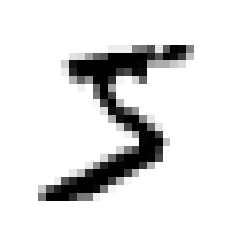

In [17]:
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off") # Tp turn off the border or x, y axis
plt.show()

In [18]:
y[0]

'5'

In [19]:
y = y.astype(int)

In [20]:
y[0]

5

In [21]:
# The MNIST dataset is actually already split into a training set (the first 60,000
# images) and a test set (the last 10,000 images):

In [22]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

Training a Binary Classifier
Let’s simplify the problem for now and only try to identify one digit—for example,
the number 5. This “5-detector” will be an example of a binary classifier, capable of
distinguishing between just two classes, 5 and not-5. Let’s create the target vectors for
this classification task:

In [23]:
y_train_5 = (y_train == 5) #true for all 5s and false for rest
y_test_5 = (y_test == 5)

now let’s pick a classifier and train it. A good place to start is with a Stochastic
Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class. This classifier
has the advantage of being capable of handling very large datasets efficiently.
This is in part because SGD deals with training instances independently, one at a time
(which also makes SGD well suited for online learning), as we will see later. Let’s create
an SGDClassifier and train it on the whole training set:

In [24]:
from sklearn.linear_model import SGDClassifier

In [31]:
sgd_clf = SGDClassifier(random_state=42) 
sgd_clf.fit(x_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

if you use a particular value for random_state(random_state = 1 or any other value) everytime the result will be same,i.e, same values in train and test datasets.

In [32]:
sgd_clf.predict([some_digit])

array([ True])

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [36]:
skfold = StratifiedKFold(n_splits=3, random_state=42)
for tr_index, te_index in skfold.split(x_train, y_train_5):
    clone = clone(sgd_clf)
    xtr_f = x_train[tr_index]
    ytr_f = y_train[tr_index]
    xte_f = x_train[te_index]
    yte_f = y_train[te_index]
    
    clone.fit(xtr_f, ytr_f)
    y_pred = clone.predict(xte_f)
    y_pred, len(y_pred), yte_f
    n_correct = sum(y_pred == yte_f)
    print(n_correct/len(y_pred))

C:\Users\175045\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.8787


TypeError: 'SGDClassifier' object is not callable

Same can be acheived by sklearn function cross_val_score function, but logic must be clear

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])